<p>Перед отделом маркетинга интернет-магазина "Магратея" поставлена задача увеличения выручки.</p>
<p>Подготовлено 9 гипотез, которые необходимо приоритезировать.</p>
<p>По выбраной гипотезе провести А/В тест и проанализировать его результаты</p>

<a id='top'></a>
# План проекта:
### <a href='#Step_0'>Импорт файлов с данными и изучение общей информации</a>
#### <a href='#Step_0_conclusion'>Вывод</a>

### <a href='#Step_0_1'>Подготовка данных</a>
#### <a href='#Step_0_1_conclusion'>Вывод</a>

### <a href='#Step_1'>Часть 1. Приоритизация гипотез</a>
#### <a href='#Step_1_1'>Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета</a>
#### <a href='#Step_1_2'>Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета</a>
#### <a href='#Step_1_conclusion'>Вывод</a>

### <a href='#Step_2'>Часть 2. Анализ A/B-теста</a>
#### <a href='#Step_2_1'>Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения</a>
#### <a href='#Step_2_2'>Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения</a>
#### <a href='#Step_2_3'>Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения</a>
#### <a href='#Step_2_4'>Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения</a>
#### <a href='#Step_2_5'>Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения</a>
#### <a href='#Step_2_6'>Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения</a>
#### <a href='#Step_2_7'>Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей</a>
#### <a href='#Step_2_8'>Постройте точечный график стоимостей заказов. Сделайте выводы и предположения</a>
#### <a href='#Step_2_9'>Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов</a>
#### <a href='#Step_2_10'>Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения</a>
#### <a href='#Step_2_11'>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения</a>
#### <a href='#Step_2_12'>Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения</a>
#### <a href='#Step_2_13'>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения</a>
#### <a href='#Step_2_conclusion'>Вывод</a>

### <a href='#Step_6'>Общий вывод</a>

<a id='Step_0'></a>
### Импорт файлов с данными и изучение общей информации. 

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
from collections import Counter

In [2]:
register_matplotlib_converters()

In [3]:
#Настроим вывод текста в ячейках без ограничения длины
pd.set_option('display.max_colwidth', -1)

In [4]:
#Импортируем датасет hypothesis.csv
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [5]:
#Изучим hypothesis методом info
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
#Проверим наличие дубликатов
hypothesis.duplicated().sum()

0

In [7]:
#Выведем hypothesis
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
#Импортируем датасет orders.csv
orders = pd.read_csv('/datasets/orders.csv')

In [9]:
#Изучим orders методом info 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#Проверим наличие дубликатов
orders.duplicated().sum()

0

In [11]:
#Выведем первые 5 строк orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
#Проверим, есть ли такие visitorId, которые попали и в группу А и в группу В
#Получим список уникальных пользователей группы А
uniquevisitorsA = orders[orders['group']=='A']['visitorId'].unique()

In [13]:
#Получим список уникальных пользователей группы В
uniquevisitorsB = orders[orders['group']=='B']['visitorId'].unique()

In [14]:
#Получим список пользователей, которые попали в обе группы
commonvisitors = list((Counter(uniquevisitorsA) & Counter(uniquevisitorsB)).elements())

In [15]:
#Посчитаем количество пользователей, которые попали в обе группы
len(commonvisitors)

58

In [16]:
#Импортируем датасет visitors.csv
visitors = pd.read_csv('/datasets/visitors.csv')

In [17]:
#Изучим visitors методом info 
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
#Проверим наличие дубликатов
visitors.duplicated().sum()

0

In [19]:
#Выведем первые 5 строк visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<a id='Step_0_conclusion'></a>
### Вывод:
1. Пропуски отсутствуют
2. Дубликаты отсутствуют
3. В ордерс попали заказы, совершенные пользователями, которые попали в обе группы одновременно. Такие заказы нужно удалить.
3. Столбцы с датами необходимо превести к типу данных datetime

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_0_1'></a>
### Подготовка данных 

In [20]:
#Заменим тип данных в столбцах со временем на datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [21]:
#Удалим из orders покупки, совершенные пользователями, которые попали в обе группы
orders = orders.query('visitorId not in @commonvisitors')

In [22]:
#Проверим результат в orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [23]:
#Проверим результат в visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<a id='Step_0_1_conclusion'></a>
### Вывод:
Данные преведены к необходимым типам. Можно начинать исследование.

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_1'></a>
### Часть 1. Приоритизация гипотез 

<a id='Step_1_1'></a>
#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета 

In [24]:
#Добавим полученные значения ICE к существующей таблице 
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

In [25]:
#Отсортируем гипотезы в порядке убывания значения ICE
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**<a href='#top'>Вернуться в начало</a>**

<a id='Step_1_2'></a>
#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета 

In [26]:
#Добавим полученные значения RICE к существующей таблице 
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

In [27]:
#Отсортируем гипотезы в порядке убывания значения ICE
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**<a href='#top'>Вернуться в начало</a>**

<a id='Step_1_conclusion'></a>
### Вывод:
1. Топ-3 гипотезы по фреймворку ICE: 8, 0, 7
2. Топ-3 гипотезы по фреймворку RICE: 7, 2, 0
3. При применении RICE вместо ICE на первое место вышла гипотеза 7. Это произошло из-за того, что у нее значение Reach значиетельно выше других гипотез. Гипотеза 2 вышла на второе место, тк значение Reach у нее также высоко, при этом менее затратна, чем 7. Гипотеза 0 удержалась в топ-3 благодаря высокому значению Impact.

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2'></a>
### Часть 2. Анализ A/B-теста 

<a id='Step_2_1'></a>
#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения 

In [28]:
#Создайте датафрейм с уникальными парами значений 'date' и 'group', таблицы orders.
datesGroups = orders[['date', 'group']].drop_duplicates()

In [29]:
#Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [30]:
ordersAggregated = ordersAggregated.sort_values(by=['date','group'])

In [31]:
#Соберем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [32]:
visitorsAggregated = visitorsAggregated.sort_values(by=['date','group'])

In [33]:
#Объединим таблицы ordersAggregated и visitorsAggregated
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, on=['date','group'])

In [34]:
#Переименуем столбцы в объединенной таблице
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [35]:
#Объявим перемнные с данными о датах, выручке и числе заказов в группах A и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

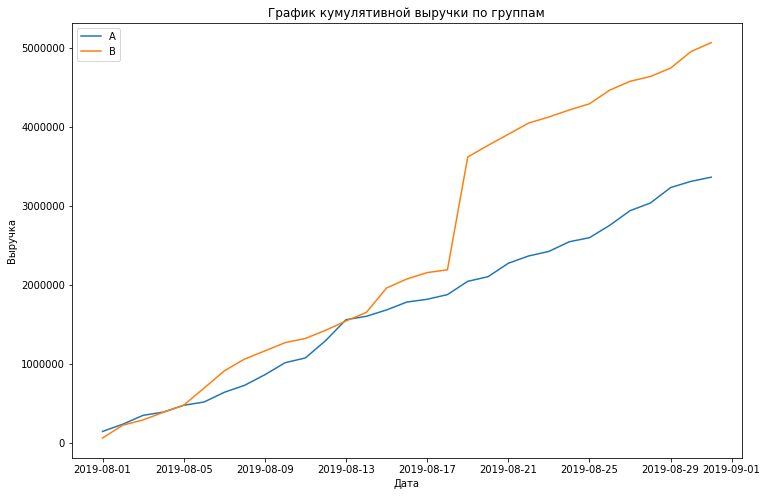

In [36]:
#Построим графики кумулятивной выручки по группам
plt.figure(figsize=(12,8))
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show()

1. Сегмент В лидирует на протяжении всего теста
2. Во второй половине теста происходит сильный скачек в сегменте В, в результате которго он еще сильнее отрывается от А.
3. Необходимо исследовать аномально большие заказы

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_2'></a>
#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения 

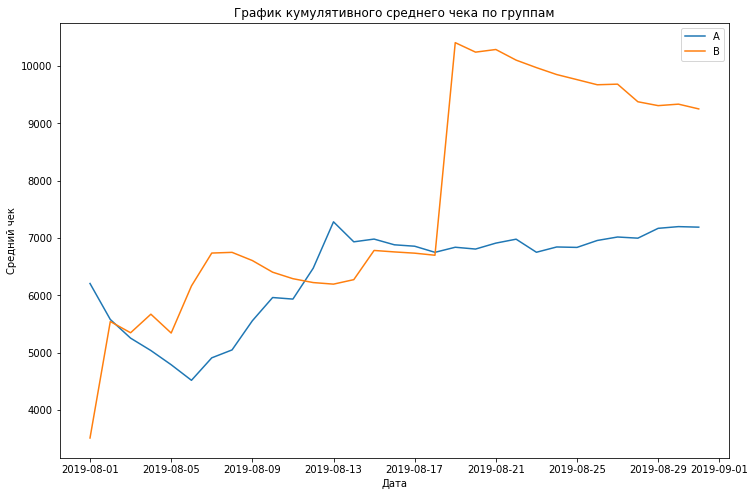

In [37]:
#Построим графики кумулятивного среднего чека по группам
plt.figure(figsize=(12,8))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

1. Кумулятивный средний чек группы В лидирует над А почти на протяжении всего теста
2. Во второй половине теста происходит сильный скачек в сегменте В, в результате которго он еще сильнее отрывается от А.
3. Необходимо исследовать аномально большие заказы 

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_3'></a>
#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения 

In [38]:
#Объединим таблицы cumulativeRevenueA и cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

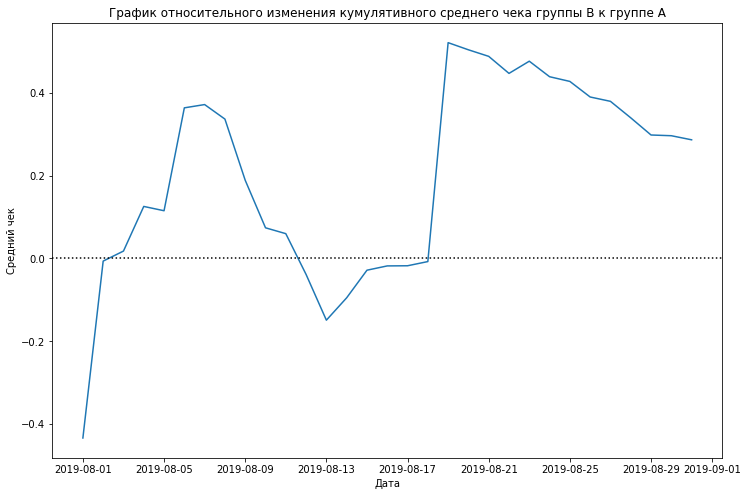

In [39]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(12,8))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(
    mergedCumulativeRevenue['date'], (
        mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
        mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='dotted')
plt.show()

Резкие изменения графика еще один довод в пользу исследования аномально больших заказов

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_4'></a>
#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения 

In [40]:
#Добавим столбец с кумулятивной конверсией
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [41]:
#Выделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [42]:
#Выделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

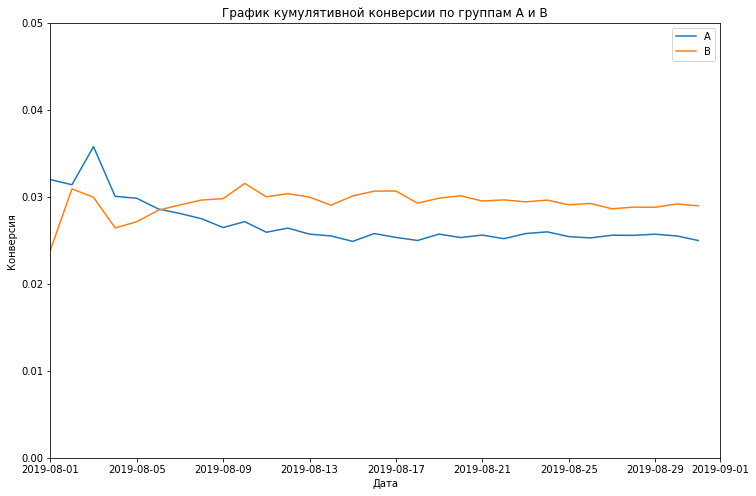

In [43]:
#Построbv график кумулятивной конверсии
plt.figure(figsize=(12,8))
plt.title('График кумулятивной конверсии по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])
plt.show()

1. В начале теста сегмент А лидировал
2. После 5 августа сегмент В вырвался вперед
3. К концу теста линии графиков почти параллельны

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_5'></a>
#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения

In [44]:
#Объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

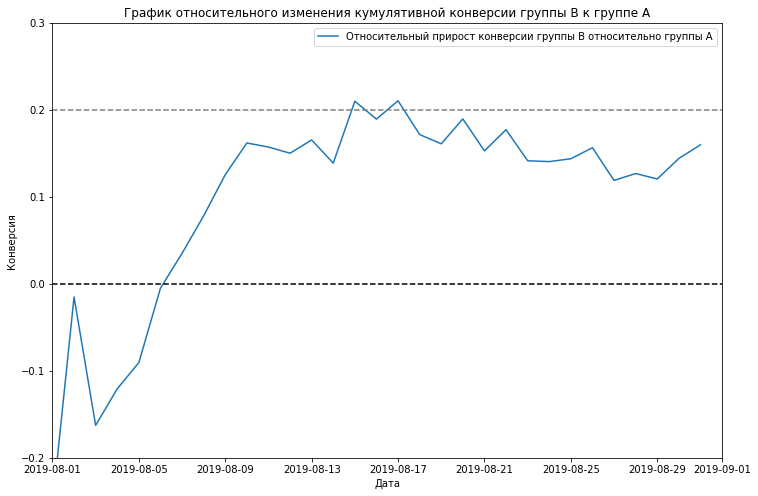

In [45]:
#Построим график относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(12,8))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])
plt.show()

Группа В лидирует над группой А в начале теста. Во второй половине теста эта динамика снижается.

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_6'></a>
#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

In [46]:
#Найдем число заказов на каждого пользователя
ordersByUsers = orders.drop(
    ['group', 'revenue', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})

In [47]:
#Переименуем названия столбцов
ordersByUsers.columns = ['visitorId', 'orders']

In [48]:
#Отсортируем в порядке убывания количества заказов
ordersByUsers = ordersByUsers.sort_values(by='orders',ascending=False)
ordersByUsers.head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


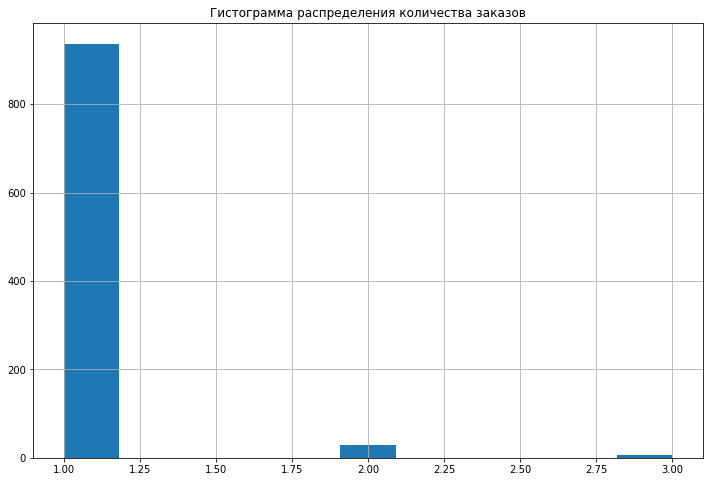

In [49]:
#Построим гистограмму распределения количества заказов
plt.figure(figsize=(12,8))
plt.title('Гистограмма распределения количества заказов')
plt.grid(True)
plt.hist(ordersByUsers['orders'], bins=11)
plt.show()

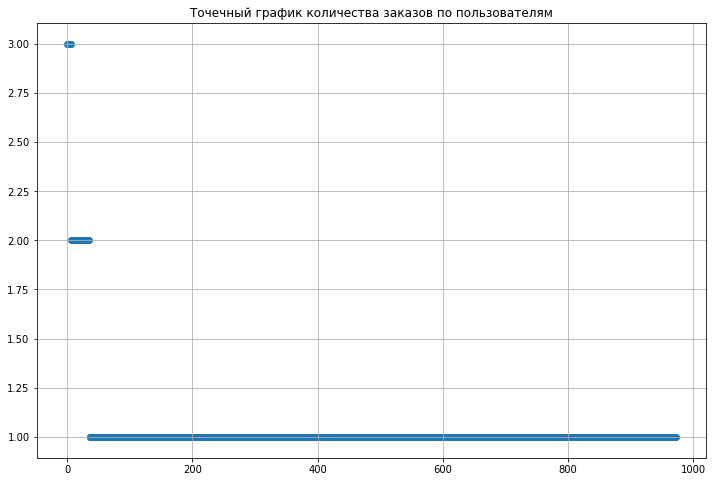

In [50]:
#Построим точечный график количества заказов по пользователям
plt.figure(figsize=(12,8))
plt.title('Точечный график количества заказов по пользователям')
plt.grid(True)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

1. Подавляющее большинство пользователей совершили 1 заказ
2. Совершивших 2 заказа и более совсем мало

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_7'></a>
#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей 

In [51]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

1. Не более 1% пользователей совершили 2 и более заказов
2. Не более 5% пользователей совершили 1 и более заказов

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_8'></a>
#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

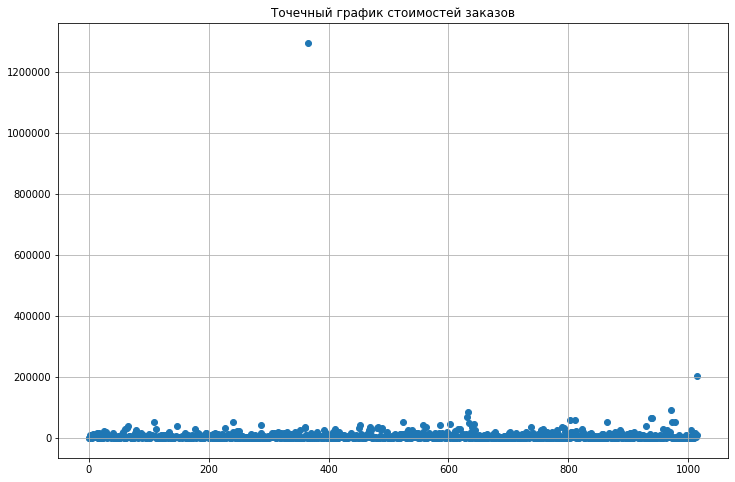

In [52]:
plt.figure(figsize=(12,8))
plt.title('Точечный график стоимостей заказов')
plt.grid(True)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

1. Подавляющее большинство заказов не превышает 100 000р.
2. Есть 1 заказ на 1 200 000р.

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_9'></a>
#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [53]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

1. Не более 1% пользователей совершили заказ на сумму 53904р. и более
2. Не более 5% пользователей совершили 26785,00 и более

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_10'></a>
#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения

##### Сформулируем гипотезы для проверки:
- Н0 "Конверсия группы А равна конверсии группы В"
- Н1 "Конверсия группы А отличается от конверсии группы В"

In [54]:
#Найдем число пользователей группы А по дням
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [55]:
#Найдем куммулятивное число пользователей группы А по дням
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
    {'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [56]:
#Найдем число пользователей группы В по дням
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [57]:
#Найдем куммулятивное число пользователей группы В по дням
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
    {'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [58]:
#Найдем ежедневные количество заказов и выручку для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg(
    {'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [59]:
#Найдем ежедневные куммулятивное количество заказов и куммулятивную выручку для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date' : 'max',
         'ordersPerDateA' : 'sum',
         'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [60]:
#Найдем ежедневные количество заказов и выручку для группы B
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg(
    {'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [61]:
#Найдем ежедневные куммулятивное количество заказов и куммулятивную выручку для группы B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date' : 'max',
         'ordersPerDateA' : 'sum',
         'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [62]:
#Сделаем результирующую таблицу с посчитанными метриками
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [63]:
#Найдем число заказов для каждого пользователя группы А
ordersByUsersA = orders[orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [64]:
#Найдем число заказов для каждого пользователя группы В
ordersByUsersB = orders[orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [65]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [66]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [67]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [68]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [69]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [70]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [71]:
#Посчитаем статистическую значимость различия конверсии
"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.00551'

In [72]:
#Посчитаем относительное различие в конверсии между группами
"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)

'0.160'

1. P-value меньше 0,05, поэтому нулевую гипотезу "Конверсия группы А равна конверсии группы В" отвергаем
2. Относительный прирост конверсии группы В к конверсии группы А 16%

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_11'></a>
#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

##### Сформулируем гипотезы для проверки:
- Н0 "Средний чек группы А равен среднему чеку группы В"
- Н1 "Средний чек группы А отличается среднего чека группы В"

In [73]:
#Посчитаем статистическую значимость различия в среднем чеке
"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.415'

In [74]:
#Посчитаем относительное различие в среднем чеке между группами
"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.287'

1. P-value больше 0,05, поэтому нулевую гипотезу "Средний чек группы А равна конверсии группы В" не можем отвергнуть
2. Относительный прирост конверсии группы В к конверсии группы А почти 29%

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_12'></a>
#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения

##### Сформулируем гипотезы для проверки:
- Н0 "Конверсия группы А равна конверсии группы В"
- Н1 "Конверсия группы А отличается от конверсии группы В"

In [75]:
#Отсеем пользователей, которые имеют более 2х заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

In [76]:
#Отсеем пользователей, с суммой покупок более 28000р.
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [77]:
#Создадим список аномальных пользователей
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [78]:
#Создадим переменную с данными о заказах группы А без аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [79]:
#Создадим переменную с данными о заказах группы B без аномальных пользователей
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [80]:
#Посчитаем статистическую значимость различия конверсии
"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.00473'

In [81]:
#Посчитаем относительное различие в конверсии между группами
"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.189'

1. P-value меньше 0,05, поэтому нулевую гипотезу "Конверсия группы А равна конверсии группы В" отвергаем
2. Относительный прирост конверсии группы В к конверсии группы А почти 17% (увеличилась по сравнению с сырыми данными)

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_13'></a>
#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

##### Сформулируем гипотезы для проверки:
- Н0 "Средний чек группы А равен среднему чеку группы В"
- Н1 "Средний чек группы А отличается среднего чека группы В"

In [82]:
#Посчитаем статистическую значимость различия в среднем чеке
"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

'0.381'

In [83]:
#Посчитаем относительное различие в среднем чеке между группами
"{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

'-0.022'

1. P-value больше 0,05, поэтому нулевую гипотезу "Средний чек группы А равна конверсии группы В" не можем отвергнуть
2. Относительный прирост конверсии группы В к конверсии группы А стал отрицательным. Выброс сильно влиял в результаты группы

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2_conclusion'></a>
### Вывод:
Различия конверсий значимы и в "сырых", и в "очищенных" данных.
Различия в среднем чеке и в "сырых", и в "очищенных" данных не значимы.
Выброс очень сильно смещал среднюю оценку по среднему чеку. По "сырым" данным группа B была заметно лучше, но после очиски данных результат изменился на противоположный. 
Примем решение завершить эксперимент и признать победу группы B, которая продемонстрировала статистически значимо большие результаты по конверсии.



**<a href='#top'>Вернуться в начало</a>**

<a id='Step_6'></a>
## Общий вывод:
### Часть 1. Приоритизация гипотез
1. Топ-3 гипотезы по фреймворку ICE: 8, 0, 7
2. Топ-3 гипотезы по фреймворку RICE: 7, 2, 0
3. При применении RICE вместо ICE на первое место вышла гипотеза 7. Это произошло из-за того, что у нее значение Reach значиетельно выше других гипотез. Гипотеза 2 вышла на второе место, тк значение Reach у нее также высоко, при этом она менее трудозатратна, чем 7. Гипотеза 0 удержалась в топ-3 благодаря высокому значению Impact.

### Часть 2. Анализ A/B-теста
1. Анализ гравификов кумулятивного среднего чека групп А и В показал наличие резких скачков, что свидетельствует о выбросах.
2. Различия конверсий значимы и в "сырых", и в "очищенных" данных.
3. Различия в среднем чеке и в "сырых", и в "очищенных" данных не значимы.
4. Выброс очень сильно смещал среднюю оценку по среднему чеку. По "сырым" данным группа B была заметно лучше, но после очиски данных результат изменился на противоположный. 
5. Примем решение завершить эксперимент и признать победу группы B, которая продемонстрировала статистически значимо большие результаты по конверсии.

**<a href='#top'>Вернуться в начало</a>**